# Univariate Linear Regression

In [79]:
# import libraries
library(caret)
library(tidyverse)
library(AppliedPredictiveModeling)

## Alligator data: predict weight from snout length

<img src="alligator.jpeg",width=400,height=200 >
[Image via Wikimedia Commons]

### Explore + visualize data

In [5]:
alligator = data.frame(
  ln_snout_length = c(3.87, 3.61, 4.33, 3.43, 3.81, 3.83, 3.46, 3.76,
    3.50, 3.58, 4.19, 3.78, 3.71, 3.73, 3.78),
  ln_weight = c(4.87, 3.93, 6.46, 3.33, 4.38, 4.70, 3.50, 4.50,
    3.58, 3.64, 5.90, 4.43, 4.38, 4.42, 4.25)
)

head(alligator, 5)

ln_snout_length,ln_weight
3.87,4.87
3.61,3.93
4.33,6.46
3.43,3.33
3.81,4.38


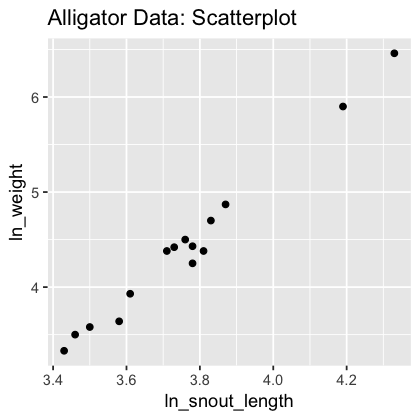

In [8]:
plot <- alligator %>% 
ggplot(aes(x =ln_snout_length, y = ln_weight)) + 
geom_point() + ggtitle("Alligator Data: Scatterplot")

plot
options(repr.plot.width=3, repr.plot.height=3)

### Create a model

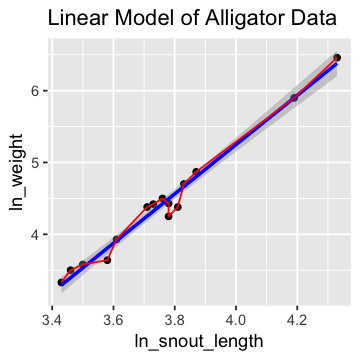

In [7]:
# ggplot can add a linear model using stat_smooth
plot + stat_smooth(method = "lm", col = "blue") + 
geom_line(colour = "red") + ggtitle("Linear Model of Alligator Data")

options(repr.plot.width=3.5, repr.plot.height=3.5)

lm( ) is a built-in function that fits a linear model to the data we specify. 
* form: "response variable" ~ "explanatory variables"

Let's call it and save the fitted model:

In [9]:
fit = lm(ln_weight ~ ln_snout_length, data = alligator)

### Take a look at model fit

In [10]:
summary(fit)


Call:
lm(formula = ln_weight ~ ln_snout_length, data = alligator)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24348 -0.03186  0.03740  0.07727  0.12669 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -8.4761     0.5007  -16.93 3.08e-10 ***
ln_snout_length   3.4311     0.1330   25.80 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1229 on 13 degrees of freedom
Multiple R-squared:  0.9808,	Adjusted R-squared:  0.9794 
F-statistic: 665.8 on 1 and 13 DF,  p-value: 1.495e-12


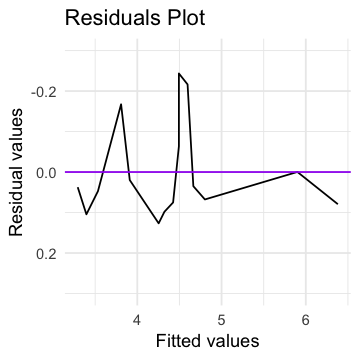

In [26]:
ggplot(lm(ln_weight ~ ln_snout_length, data=alligator)) + 
  geom_line(aes(x=.fitted, y=.resid)) + ggtitle("Residuals Plot") + 
  ylim(.3,-.3) + geom_hline(yintercept = 0, colour = "purple") + 
  theme_minimal() + xlab("Fitted values") + ylab("Residual values")


# can also use plot(fit) here

# Multivariate Linear Regression

## Abalone data: predict age of shell from characteristics

<img src="abalone.jpg",width=400,height=200 >

[Image via Wikimedia Commons]

### Explore + visualize data

In [27]:
data(abalone)

In [28]:
head(abalone)

Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [29]:
str(abalone)

'data.frame':	4177 obs. of  9 variables:
 $ Type         : Factor w/ 3 levels "F","I","M": 3 3 1 3 2 2 1 1 3 1 ...
 $ LongestShell : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings        : int  15 7 9 10 7 8 20 16 9 19 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


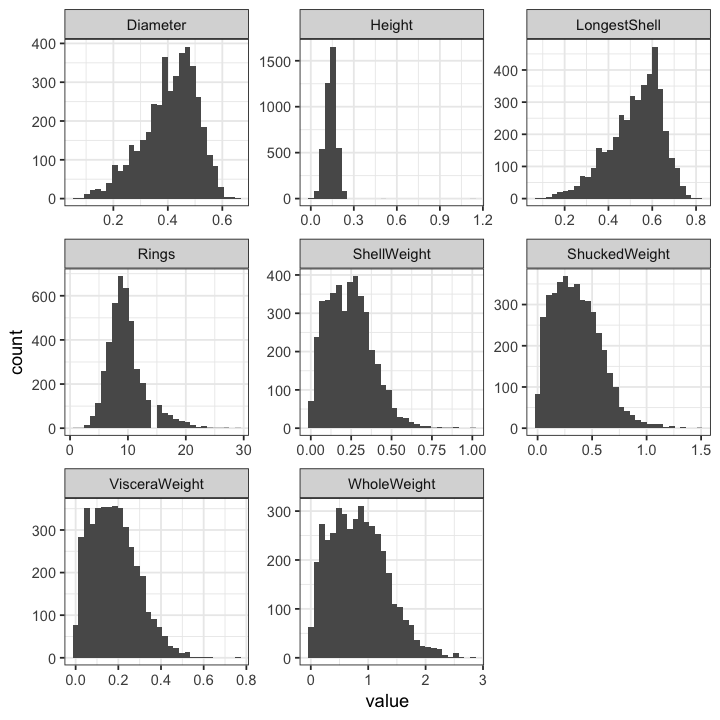

In [66]:
abalone %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram() + theme_bw()

options(repr.plot.width=7, repr.plot.height=7)

### Create training and test sets

In [35]:
set.seed(8)

train_ind <- sample(nrow(abalone), round(nrow(abalone) * 0.9))
train <- abalone[train_ind, ]
test <- abalone[-train_ind, ]

In [37]:
head(test, 5)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
15,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,10
24,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9
31,M,0.580,0.470,0.165,0.9975,0.3935,0.2420,0.330,10
33,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
38,F,0.450,0.355,0.105,0.5225,0.2370,0.1165,0.145,8


### Build model + use to predict

In [41]:
fit_lm <- lm(Rings ~ ., train)

p <- predict(fit_lm, test)

In [74]:
lm_predictions <- data.frame(actual = test$Rings, predicted = p) %>%
mutate(residual = actual - predicted)

head(lm_predictions, 5)

actual,predicted,residual
10,10.373503,-0.3735029
9,9.725631,-0.7256314
10,12.154899,-2.1548993
18,11.610424,6.3895765
8,8.757175,-0.7571747


### Evaluate performance

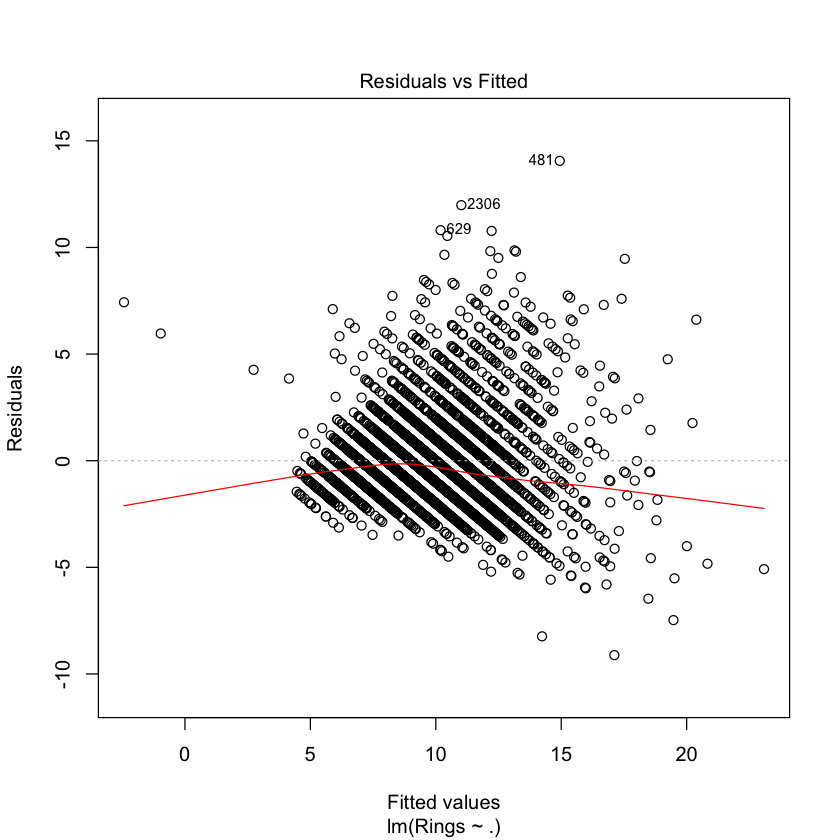

In [75]:
plot(fit_lm, which=1)
options(repr.plot.width=6, repr.plot.height=6)

In [78]:
print(paste('mean of predictions = ', mean(lm_predictions$predicted)))
print(paste('mean of truth = ', mean(lm_predictions$actual)))


print(paste('SD of predictions = ', sd(lm_predictions$predicted)))
print(paste('SD of truth = ', sd(lm_predictions$actual)))    

print(paste('mean of residuals = ', mean(lm_predictions$residual)))
print(paste('SD of residuals = ', sd(lm_predictions$residual))) 


[1] "mean of predictions =  9.81782717048277"
[1] "mean of truth =  9.92105263157895"
[1] "SD of predictions =  2.34286432368249"
[1] "SD of truth =  3.49867900279654"
[1] "mean of residuals =  0.103225461096178"
[1] "SD of residuals =  2.40111875997498"


In [82]:
# 10-fold cross validation (method = "cv" and number = 10). 
set.seed(42)
model <- train(Rings ~ ., train,
               method = "lm", 
               trControl = trainControl(method = "cv", 
                                        number = 10, 
                                        verboseIter = FALSE))
model

Linear Regression 

3759 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3383, 3383, 3383, 3383, 3383, 3384, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  2.186245  0.5338857  1.570535

Tuning parameter 'intercept' was held constant at a value of TRUE